In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.decomposition import NMF
from sklearn.decomposition import KernelPCA

#Importing data
data =  pd.read_csv("movie",index_col=None, sep="\t", encoding = 'utf-8')

In [3]:
data.sample(5)

,Unnamed: 0,director_name,num_critic_for_reviews,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,num_user_for_reviews,imdb_score,duration,title_year,language
263,325,Stephen Sommers,202.0,Brendan Fraser,Action|Adventure|Fantasy|Thriller,Dwayne Johnson,The Mummy Returns,Patricia Velasquez,ancient egypt|bracelet|king|scorpion|son,890.0,6.3,130.0,2001.0,English
143,165,Zack Snyder,451.0,Billy Crudup,Action|Drama|Mystery|Sci-Fi,Matt Frewer,Watchmen,Stephen McHattie,conspiracy|cynicism|false promise of the ameri...,1229.0,7.7,215.0,2009.0,English
1847,2648,Clare Kilner,103.0,Debra Messing,Comedy|Romance,Jack Davenport,The Wedding Date,Holland Taylor,chick flick|escort|male escort|wedding|wedding...,250.0,6.1,90.0,2005.0,English
722,897,Anthony Russo,136.0,Billy Gardell,Comedy|Romance,Todd Stashwick,"You, Me and Dupree",Amanda Detmer,best friend|foot fetish|houseguest|newlywed|we...,195.0,5.6,110.0,2006.0,English
22,26,James Cameron,315.0,Kate Winslet,Drama|Romance,Leonardo DiCaprio,Titanic,Gloria Stuart,artist|love|ship|titanic|wet,2528.0,7.7,194.0,1997.0,English


In [2]:
movie = data.drop(['Unnamed: 0'], axis=1)
print(movie.shape)
movie.sample(5)

(2763, 13)


,director_name,num_critic_for_reviews,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,num_user_for_reviews,imdb_score,duration,title_year,language
2033,Antonia Bird,131.0,Jeffrey Jones,Fantasy|Horror|Thriller,Jeremy Davies,Ravenous,David Arquette,based on true story|cannibalism|captain|mexica...,316.0,7.1,101.0,1999.0,English
1586,Paul W.S. Anderson,72.0,Cary-Hiroyuki Tagawa,Action|Adventure|Fantasy|Sci-Fi|Thriller,Christopher Lambert,Mortal Kombat,Bridgette Wilson-Sampras,based on video game|island|mortal kombat|tourn...,283.0,5.8,101.0,1995.0,English
471,Andrew Adamson,205.0,Jennifer Saunders,Adventure|Animation|Comedy|Family|Fantasy|Romance,Rupert Everett,Shrek 2,Conrad Vernon,drag queen|physical appearance|princess|queen|...,483.0,7.2,93.0,2004.0,English
2489,John Gulager,130.0,Eric Dane,Action|Comedy|Horror|Thriller,Krista Allen,Feast,Henry Rollins,bar|bloody body of child|dead boy|monster|vomi...,252.0,6.4,95.0,2005.0,English
2503,David Lean,122.0,Sessue Hayakawa,Adventure|Drama|War,William Holden,The Bridge on the River Kwai,Jack Hawkins,allies|bridge|construction|jungle|sabotage,273.0,8.2,161.0,1957.0,English


In [3]:
#Removing \xa0 from strings in movie titles

movie['movie_title'] = movie['movie_title'].apply(lambda x: x.replace('\xa0', '' ))

## Transforming categorical data into numerical  

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn import preprocessing

In [5]:
def transform(data) :
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000, min_df=2, stop_words='english',use_idf= True)
    X = vectorizer.fit_transform(data)
    X = pd.DataFrame(X.toarray())
    return(X)

In [6]:
def label_encoding(data) :
    le = preprocessing.LabelEncoder()
    X = le.fit_transform(data)
    X = pd.Series(X)
    return(X)

In [8]:
# We use vectorizer to transform categorical value with several different word for plot, genres and language

plot = transform(movie['plot_keywords'])
genres = transform(movie['genres'])
language = transform(movie['language'])

In [338]:
#Example of how works tfidf transformation

vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000, min_df=2, stop_words='english',use_idf= True)
genres_ex =  vectorizer.fit_transform(movie['genres'])
vectorizer.get_feature_names()

['action',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'family',
 'fantasy',
 'fi',
 'film',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'noir',
 'romance',
 'sci',
 'sport',
 'thriller',
 'war',
 'western']

In [9]:
# For director and actors since we don't want to split them we use label encoding

director = label_encoding(movie['director_name'])
actor_1 = label_encoding(movie['actor_1_name'])
actor_2 = label_encoding(movie['actor_2_name'])

In [46]:
# First dataframe with all categorical data transformed in numerical 

df = movie.drop(['plot_keywords','director_name','actor_1_name', 'actor_2_name', 'genres', 'language', 
                 'movie_title', 'actor_3_name'], axis = 1)
df = pd.concat([df, plot, director, actor_1, actor_2, genres, language], axis=1)
print(df.shape)

(2763, 2322)


In [340]:
#Second dataframe with plot keywords, director and actors, and genres
df2 = pd.concat([plot, director, actor_1, actor_2, genres], axis=1)

In [10]:
#Third dataframe with plot keywords and genres
df3 =pd.concat([plot, genres], axis=1)

df3.to_csv('data', sep='\t', encoding='utf-8')

## Dimension reduction 

In [355]:
def dimension_reduction(data, model) :
    W = model.fit_transform(data)
    W = pd.DataFrame(W)
    return (W)

In [356]:
# NMF with 2 components 

df_NMF2 = dimension_reduction(df, NMF(n_components=2, init='random', random_state=0))

df2_NMF2 = dimension_reduction(df2, NMF(n_components=2, init='random', random_state=0))

df3_NMF2 = dimension_reduction(df3, NMF(n_components=2, init='random', random_state=0))

In [357]:
# NMF with 5 components 

df_NMF5 = dimension_reduction(df, NMF(n_components=5, init='random', random_state=0))
df2_NMF5 = dimension_reduction(df2, NMF(n_components=5, init='random', random_state=0))
df3_NMF5 = dimension_reduction(df3, NMF(n_components=5, init='random', random_state=0))

In [418]:
# Kernel PCA 

df_kpca = dimension_reduction(df, KernelPCA(n_components=5, kernel='rbf', gamma=10))
df2_kpca = dimension_reduction(df2, KernelPCA(n_components=5, kernel='rbf', gamma=10))
df3_kpca = dimension_reduction(df3, KernelPCA(n_components=5, kernel='rbf', gamma=10))

# Clustering

In [390]:
def prediction(title, clustering, data) :
    #Letting the titles movie being the index
    indices = pd.Series(clustering.index, index=clustering['movie_title'])
    #Find the index of the choosen movie
    idx = indices.loc[title]
    #Find the cluster of this movie
    num_cluster = clustering.iloc[idx,0]
    #Get all movives title in this cluster 
    sim_movie = clustering[clustering.cluster == num_cluster].movie_title
    #Get the indices of those movies
    index_cluster = sim_movie.index
    index_cluster = pd.Series(index_cluster)
    #Slicing to get a dataframe with movies in the same cluster
    X = data.iloc[index_cluster]
    
    #Matrix of cosine similarity
    X = cosine_similarity(X, X)
    #Setting index and colummns to be the same as the movies
    a = movie.iloc[index_cluster]
    X = pd.DataFrame(X, index = a.movie_title.index, columns = a.movie_title.index)
    #adding movie title to this dataframe
    X = pd.concat([X,a.movie_title], axis=1)


    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(X[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:6]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    a = movie['movie_title'].iloc[movie_indices]
    a = pd.DataFrame(a)
    a.rename(columns={'movie_title': title}, inplace=True)
    a.reset_index(drop=True, inplace = True)
    # Return the top 10 most similar movies
    return a

In [393]:
def movie_recommendation(title1, title2, title3, title4, title5, clustering, data) :
    df = pd.concat([prediction(title1, clustering, data),prediction(title2, clustering, data),
                    prediction(title3, clustering, data),prediction(title4, clustering, data),
                    prediction(title5, clustering, data)], axis=1)
    return df

In [342]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [272]:
def kmeans(df, n_clusters) :
    km = KMeans(n_clusters)
    cluster = km.fit_predict(df)
    cluster = pd.DataFrame(cluster)
    X = pd.concat([cluster,movie['movie_title']],axis=1)
    X.columns=['cluster', 'movie_title']
    return (X)

In [343]:
def Dbscan(df) :
    # minPts=2*dim (Sander et al., 1998)
    clustering = DBSCAN(eps=1, min_samples=1000).fit_predict(df)
    clustering = pd.DataFrame(clustering)
    X = pd.concat([clustering,movie['movie_title']],axis=1)
    X.columns=['cluster', 'movie_title']
    return (X)

In [347]:
clustering = DBSCAN(eps=1, min_samples=1000).fit(df3)

In [348]:
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

0

In [406]:
def prediction_2(title, df):
    indices = pd.Series(df.index, index=df['movie_title'])
    idx = indices.loc[title]
    cluster = df.iloc[idx,0]
    a = df[df.cluster == cluster].movie_title
    a = pd.DataFrame(a)
    a.rename(columns={'movie_title': title}, inplace=True)
    a.reset_index(drop=True, inplace = True)
    return movies

In [407]:
def movie_recommendation_2(title1, title2, title3, title4, title5, data) :
    df = pd.concat([prediction_2(title1, data),prediction_2(title2, data),prediction_2(title3, data),
                   prediction_2(title4, data),prediction_2(title5, data)], axis =1)
    return df

### Kmeans

####  Kmeans with no dimension reduction

In [423]:
#With the first dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',kmeans(df, 7), df)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,The Chronicles of Narnia: The Voyage of the Da...,The Dark Knight Rises,Rise of the Planet of the Apes,The Dark Knight Rises,Waterworld
1,Ice Age: Continental Drift,Iron Man,Iron Man 2,The Amazing Spider-Man 2,Quantum of Solace
2,The Lord of the Rings: The Two Towers,The Polar Express,Ocean's Eleven,Iron Man,G.I. Joe: The Rise of Cobra
3,Rush Hour 3,WALL·E,The Hobbit: An Unexpected Journey,The Golden Compass,The World Is Not Enough
4,Night at the Museum: Battle of the Smithsonian,The Amazing Spider-Man 2,The Lord of the Rings: The Fellowship of the Ring,The Hobbit: An Unexpected Journey,Poseidon


In [424]:
#With the second dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',kmeans(df2, 7), df2)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Captain America: The Winter Soldier,The Hobbit: An Unexpected Journey,The Saint,Mars Attacks!,Alice Through the Looking Glass
1,Tomorrowland,Black Hawk Down,The Bourne Supremacy,Kung Fu Panda 2,Men in Black II
2,Gangs of New York,Knight and Day,Suicide Squad,Pirates of the Caribbean: Dead Man's Chest,The Hunger Games: Mockingjay - Part 1
3,Terminator 3: Rise of the Machines,Gladiator,Kung Fu Panda 2,Mission: Impossible,Rush Hour 3
4,Night at the Museum: Battle of the Smithsonian,Mission: Impossible II,Spectre,The Lone Ranger,Maleficent


In [425]:
#With the third dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',kmeans(df3, 7), df3)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Ant-Man,The Lord of the Rings: The Return of the King,Pirates of the Caribbean: At World's End,Volcano,Mission: Impossible - Rogue Nation
1,Mad Max: Fury Road,Lilo & Stitch,Spectre,The Amazing Spider-Man 2,Iron Man
2,Master and Commander: The Far Side of the World,How the Grinch Stole Christmas,The Dark Knight Rises,X-Men: Apocalypse,The Flowers of War
3,2012,Despicable Me 2,John Carter,Maleficent,Inception
4,Bolt,Children of Men,Harry Potter and the Half-Blood Prince,Shrek Forever After,The Revenant


#### Kmeans with NMF_2 

In [394]:
#With the first dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',kmeans(df_NMF2, 7), df_NMF2)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Charlie's Angels,X-Men: Apocalypse,Click,Now You See Me 2,Die Hard with a Vengeance
1,Hellboy II: The Golden Army,Independence Day,Captain America: Civil War,How to Train Your Dragon,Men in Black II
2,Looney Tunes: Back in Action,Life of Pi,X-Men,Sherlock Holmes,Atlantis: The Lost Empire
3,The Bourne Supremacy,A.I. Artificial Intelligence,Get Smart,The Hunger Games: Catching Fire,Daylight
4,Watchmen,Fast Five,Allegiant,Bicentennial Man,Happy Feet


In [395]:
#With the second dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',kmeans(df2_NMF2, 7), df2_NMF2)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,The Incredible Hulk,Captain America: The First Avenger,National Treasure,Lara Croft Tomb Raider: The Cradle of Life,Hairspray
1,Green Zone,Thor: The Dark World,The Good Dinosaur,Mad Max: Fury Road,Anna and the King
2,Toy Story 3,The Secret Life of Walter Mitty,"The Chronicles of Narnia: The Lion, the Witch ...",Fury,Spectre
3,Transformers: Dark of the Moon,War of the Worlds,Enchanted,Windtalkers,Quantum of Solace
4,The Dark Knight,Journey 2: The Mysterious Island,The Chronicles of Narnia: The Voyage of the Da...,Cars 2,The Other Guys


In [396]:
#With the third dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',kmeans(df3_NMF2, 7), df3_NMF2)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Rise of the Planet of the Apes,Pacific Rim,Terminator Salvation,Spectre,Spectre
1,Insurgent,The Good Dinosaur,World War Z,The Dark Knight Rises,The Dark Knight Rises
2,Night at the Museum: Battle of the Smithsonian,Star Trek Beyond,Angels & Demons,Tangled,John Carter
3,The Flowers of War,The Dark Knight,G.I. Joe: The Rise of Cobra,Avengers: Age of Ultron,Tangled
4,Harry Potter and the Sorcerer's Stone,Hugo,Up,Batman v Superman: Dawn of Justice,Harry Potter and the Half-Blood Prince


#### Kmeans with NMF 5

In [397]:
#With the first dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',kmeans(df_NMF5, 7), df_NMF5)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,G.I. Joe: The Rise of Cobra,The Sorcerer's Apprentice,Captain America: Civil War,Superman Returns,Iron Man
1,Sherlock Holmes,Avatar,Batman v Superman: Dawn of Justice,Men in Black 3,Brave
2,Ocean's Twelve,Click,The Saint,Percy Jackson: Sea of Monsters,The Edge
3,Twister,Man of Steel,The Flowers of War,Spider-Man 2,Blood Diamond
4,Zodiac,Charlotte's Web,Jack the Giant Slayer,Transcendence,End of Days


In [398]:
#With the second dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',kmeans(df2_NMF5, 7), df2_NMF5)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Flushed Away,How to Train Your Dragon 2,Up,The BFG,Iron Man 2
1,Last Action Hero,The Matrix Revolutions,Pearl Harbor,You Don't Mess with the Zohan,Hotel Transylvania
2,I Am Legend,Star Trek Into Darkness,How to Train Your Dragon 2,Braveheart,Stuart Little
3,"I, Robot",Captain America: The First Avenger,War of the Worlds,Captain America: The First Avenger,Cloud Atlas
4,Unstoppable,Surf's Up,A.I. Artificial Intelligence,Harry Potter and the Prisoner of Azkaban,The Spiderwick Chronicles


In [399]:
#With the third dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',kmeans(df3_NMF5, 7), df3_NMF5)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Dante's Peak,Tangled,Battleship,"Monsters, Inc.",The Hunger Games: Catching Fire
1,The Road to El Dorado,Furious 7,Harry Potter and the Half-Blood Prince,Frozen,Troy
2,Edge of Tomorrow,Transformers: Dark of the Moon,Ali,Hugo,The Smurfs
3,The Lone Ranger,Indiana Jones and the Kingdom of the Crystal S...,Volcano,Fast Five,The Three Musketeers
4,The Secret Life of Walter Mitty,Up,Madagascar 3: Europe's Most Wanted,Jumper,Mulan


####  Kmeans with kernel PCA

In [412]:
#With the first dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',kmeans(df_kpca, 7), df_kpca)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,The Chronicles of Narnia: The Voyage of the Da...,Unstoppable,Suspect Zero,Cars 2,Ant-Man
1,Toy Story 2,I Am Number Four,Dark City,Warcraft,X-Men: Apocalypse
2,Enemy at the Gates,"I, Robot",The Golden Compass,Edge of Tomorrow,Marley & Me
3,Batman Begins,Tropic Thunder,30 Days of Night,Madagascar: Escape 2 Africa,Eragon
4,Now You See Me 2,The Negotiator,The Rock,Shrek the Third,Spirit: Stallion of the Cimarron


In [416]:
#With the second dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',kmeans(df2_kpca, 7), df2_kpca)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Barbarella,X-Men: The Last Stand,Tangled,Captain America: Civil War,Batman v Superman: Dawn of Justice
1,Lady Vengeance,The Amazing Spider-Man 2,Batman v Superman: Dawn of Justice,X-Men: The Last Stand,The Hobbit: The Desolation of Smaug
2,The Lady from Shanghai,The Good Dinosaur,The Hobbit: The Desolation of Smaug,Monsters University,X-Men: The Last Stand
3,Captain America: Civil War,Up,Captain America: Civil War,Toy Story 3,Green Lantern
4,Toy Story 3,Inception,Jurassic World,Indiana Jones and the Kingdom of the Crystal S...,Toy Story 3


In [419]:
#With the third dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',kmeans(df3_kpca, 7), df3_kpca)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Seabiscuit,Best in Show,2012,Penguins of Madagascar,Looper
1,Apollo 18,Enter the Void,Looney Tunes: Back in Action,Star Wars: Episode III - Revenge of the Sith,Blade II
2,A View to a Kill,The Best Exotic Marigold Hotel,Iron Man 3,Tomorrowland,I Spit on Your Grave
3,"Crouching Tiger, Hidden Dragon",The Crocodile Hunter: Collision Course,Transformers: Age of Extinction,Riding in Cars with Boys,Shadow of the Vampire
4,Bronson,There Will Be Blood,47 Ronin,Mr. & Mrs. Smith,Se7en


### Spectral clustering

C:\Users\celia\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


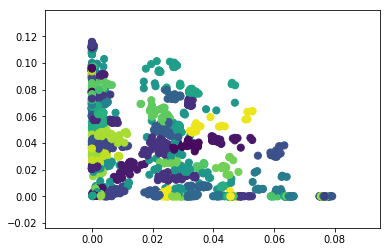

In [429]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=100, affinity='nearest_neighbors',assign_labels='kmeans')
labels = model.fit_predict(df3_NMF2)
plt.scatter(df3_NMF2.iloc[:, 0], df3_NMF2.iloc[:, 1], c=labels,
            s=50);


In [432]:
def spectral(df, n_clusters) :
    model = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors',assign_labels='kmeans')
    predict = model.fit_predict(df)
    predict = pd.DataFrame(predict)
    X = pd.concat([predict,movie['movie_title']],axis=1)
    X.columns=['cluster', 'movie_title']
    return (X)

In [433]:
#With the first dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',spectral(df, 7), df)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Thor,John Carter,Batman Returns,John Carter,The Dark Knight
1,Hotel Transylvania,Monsters vs. Aliens,Little Fockers,X-Men: The Last Stand,Superman Returns
2,The Holiday,Shrek Forever After,The Sorcerer's Apprentice,Monsters vs. Aliens,Up
3,Suicide Squad,Brave,Snow White and the Huntsman,Robin Hood,Mars Needs Moms
4,Mr. Peabody & Sherman,X-Men: The Last Stand,Pompeii,Terminator 3: Rise of the Machines,Tomorrowland


In [434]:
#With the second dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',spectral(df2, 7), df2)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,The Wolfman,Prometheus,Mystery Men,The Terminal,The Curious Case of Benjamin Button
1,Bee Movie,The Legend of Zorro,Step Brothers,Night at the Museum: Secret of the Tomb,Mission: Impossible - Rogue Nation
2,Troy,The Green Mile,Harry Potter and the Order of the Phoenix,Mission: Impossible - Rogue Nation,Kung Fu Panda
3,Dinosaur,Les Misérables,Oblivion,Pirates of the Caribbean: Dead Man's Chest,The Good Dinosaur
4,Surrogates,Independence Day,Avengers: Age of Ultron,Thirteen Days,G.I. Joe: The Rise of Cobra


In [ ]:
#With the third dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',spectral(df3, 7), df3)

### Ward

In [439]:
from sklearn.cluster import AgglomerativeClustering

def ward(df, n_clusters) :
    wd = AgglomerativeClustering(n_clusters= n_clusters, affinity='euclidean', linkage='ward')
    predict = wd.fit_predict(df)
    predict = pd.DataFrame(predict)
    X = pd.concat([predict,movie['movie_title']],axis=1)
    X.columns=['cluster', 'movie_title']
    return (X)

In [440]:
#With the first dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',ward(df, 7), df)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Armageddon,The Dark Knight Rises,Minority Report,The Dark Knight Rises,Independence Day: Resurgence
1,300: Rise of an Empire,Green Lantern,X-Men 2,Pirates of the Caribbean: On Stranger Tides,Avengers: Age of Ultron
2,Pearl Harbor,Jack the Giant Slayer,Wrath of the Titans,Green Lantern,The Huntsman: Winter's War
3,The Last Samurai,Iron Man 3,Harry Potter and the Order of the Phoenix,Pirates of the Caribbean: Dead Man's Chest,Frozen
4,Cloud Atlas,Pirates of the Caribbean: On Stranger Tides,Starship Troopers,Pacific Rim,Enemy at the Gates


In [442]:
#With the second dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',ward(df2, 7), df2)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Night at the Museum: Battle of the Smithsonian,Knight and Day,Now You See Me 2,Pirates of the Caribbean: The Curse of the Bla...,A Christmas Carol
1,The Matrix Revolutions,Abraham Lincoln: Vampire Hunter,Enchanted,The Dark Knight,Tomorrowland
2,Get Smart,The Secret Life of Pets,The Dark Knight,Puss in Boots,World War Z
3,Thor,Flight of the Phoenix,Wrath of the Titans,Lethal Weapon 4,The Mummy: Tomb of the Dragon Emperor
4,The BFG,The Legend of Zorro,Spectre,Bad Boys II,Monsters University


In [443]:
#With the first dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',ward(df3, 7), df3)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Toy Story 3,Ghost Rider,Pirates of the Caribbean: At World's End,Mission to Mars,Suicide Squad
1,The Hobbit: The Battle of the Five Armies,Legend of the Guardians: The Owls of Ga'Hoole,Spectre,The Amazing Spider-Man 2,The Amazing Spider-Man 2
2,Transformers: Revenge of the Fallen,Mr. Peabody & Sherman,The Dark Knight Rises,X-Men: Apocalypse,The Incredible Hulk
3,Tangled,The Secret Life of Walter Mitty,John Carter,Maleficent,Brave
4,The Golden Compass,Mulan,Harry Potter and the Half-Blood Prince,Shrek Forever After,Terminator 3: Rise of the Machines


#### Ward with NMF5

In [444]:
#With the first dataframe
movie_recommendation('The Lion King','Titanic','Iron Man','Inception','The Hangover',ward(df3_NMF5, 7), df3_NMF5)

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,The Time Machine,Tangled,Battleship,The Croods,Sherlock Holmes: A Game of Shadows
1,Captain America: Civil War,Furious 7,Harry Potter and the Half-Blood Prince,Frozen,G.I. Joe: Retaliation
2,Guardians of the Galaxy,Transformers: Dark of the Moon,The Princess and the Frog,Hugo,The Taking of Pelham 1 2 3
3,"Monsters, Inc.",Indiana Jones and the Kingdom of the Crystal S...,Seabiscuit,The Bourne Legacy,Click
4,The Matrix Revolutions,Up,Men in Black II,The 6th Day,Rio


# Distance 

In [457]:
def recommendation_3(title, df):
    
    # Get the index of the movie that matches the title
    indices = pd.Series(df.index, index=df['movie_title'])
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(df[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    a = movie['movie_title'].iloc[movie_indices]
    a = pd.DataFrame(a)
    a.rename(columns={'movie_title': title}, inplace=True)
    a.reset_index(drop=True, inplace = True)
    # Return the top 10 most similar movies
    return a

In [452]:
def movie_recommendation_3(title1, title2, title3, title4, title5, data) :
    df = pd.concat([recommendation_3(title1, data),recommendation_3(title2, data),
                    recommendation_3(title3, data),recommendation_3(title4,  data),
                    recommendation_3(title5, data)], axis=1)
    return df

##  Cosine distance 

In [453]:
from sklearn.metrics.pairwise import cosine_similarity

In [454]:
def cosine(df) :
    X = cosine_similarity(df, df)
    X = pd.DataFrame(X)
    X = pd.concat([X, movie['movie_title']], axis=1)
    return(X)

#### Cosine without dimension reduction

In [458]:
#With the first dataframe
movie_recommendation_3('The Lion King','Titanic','Iron Man','Inception','The Hangover', cosine(df))

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Deep Blue Sea,Superman Returns,The Big Lebowski,Superman Returns,The Lost World: Jurassic Park
1,Adaptation.,Moulin Rouge!,District 9,Pirates of the Caribbean: The Curse of the Bla...,Maleficent
2,Legally Blonde,Brokeback Mountain,Battle Los Angeles,Moulin Rouge!,Wanted
3,Memoirs of a Geisha,Signs,Shutter Island,Batman Begins,Rush
4,Superman,Pirates of the Caribbean: The Curse of the Bla...,Dogma,Memento,Man on Fire


In [459]:
#With the first dataframe
movie_recommendation_3('The Lion King','Titanic','Iron Man','Inception','The Hangover', cosine(df2))

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,The X Files,The Replacements,Kabhi Alvida Naa Kehna,Latter Days,Kung Fu Panda 2
1,What Women Want,The Specialist,My Name Is Khan,The Order,RED
2,The Color Purple,Unfriended,Minions,The Beach,Coach Carter
3,Mona Lisa Smile,Layer Cake,Into the Blue,X-Men: Days of Future Past,Pushing Tin
4,UHF,Last Vegas,Toy Story 3,Trainspotting,Charlie's Angels


In [460]:
#With the first dataframe
movie_recommendation_3('The Lion King','Titanic','Iron Man','Inception','The Hangover', cosine(df3))

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Enchanted,Vicky Cristina Barcelona,John Carter,Cypher,EuroTrip
1,The Princess and the Frog,Shopgirl,Avengers: Age of Ultron,G.I. Joe: The Rise of Cobra,Scary Movie 4
2,Rio,Pride & Prejudice,Batman v Superman: Dawn of Justice,Armageddon,Porky's
3,Frozen,Before Sunrise,Superman Returns,The Day After Tomorrow,Wanderlust
4,The Hunchback of Notre Dame,Before Sunset,Captain America: Civil War,The Chronicles of Riddick,Neighbors


#### Cosine with NMF5

In [461]:
#With the first dataframe
movie_recommendation_3('The Lion King','Titanic','Iron Man','Inception','The Hangover', cosine(df_NMF5))

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Contact,V for Vendetta,Mission: Impossible II,Interstellar,Wanted
1,Back to the Future,Avatar,Iron Man 2,Batman Begins,The Hangover Part II
2,Star Trek: The Motion Picture,Saw,Little Miss Sunshine,The Dark Knight Rises,Monty Python and the Holy Grail
3,The Faculty,Star Trek,Under the Skin,Silent Hill,Bad Santa
4,Cruel Intentions,Napoleon Dynamite,Face/Off,Memento,The Family Stone


In [462]:
#With the first dataframe
movie_recommendation_3('The Lion King','Titanic','Iron Man','Inception','The Hangover', cosine(df2_NMF5))

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Deep Blue Sea,Phenomenon,Star Trek: Insurrection,Mystic River,Spy Game
1,Eternal Sunshine of the Spotless Mind,The Medallion,A League of Their Own,The Order,Kung Fu Panda 2
2,The X Files,The Hunger Games,Anna Karenina,Grave Encounters,Tootsie
3,The BFG,13 Going on 30,Kids,Four Lions,Becoming Jane
4,Star Trek: The Motion Picture,Good Will Hunting,Phenomenon,X-Men: The Last Stand,Quarantine


In [463]:
#With the first dataframe
movie_recommendation_3('The Lion King','Titanic','Iron Man','Inception','The Hangover', cosine(df3_NMF5))

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Coraline,Memoirs of a Geisha,2012,Predators,Neighbors
1,The Nativity Story,Anna Karenina,Captain America: Civil War,Jumper,Old School
2,Rise of the Guardians,Curse of the Golden Flower,Flash Gordon,G.I. Joe: Retaliation,St. Trinian's
3,The Golden Compass,Love in the Time of Cholera,Logan's Run,Escape from L.A.,Napoleon Dynamite
4,Touching the Void,Sweet November,The Lost World: Jurassic Park,Mad Max,East Is East


#### Cosine with kpca

In [464]:
#With the first dataframe
movie_recommendation_3('The Lion King','Titanic','Iron Man','Inception','The Hangover', cosine(df_kpca))

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Waking Ned Devine,Star Trek: Insurrection,Tomorrowland,Memoirs of a Geisha,Talladega Nights: The Ballad of Ricky Bobby
1,Olympus Has Fallen,Ice Age: The Meltdown,Mission: Impossible III,Big Fish,30 Days of Night
2,Hancock,Transformers: Revenge of the Fallen,Battleship,Everybody's Fine,Out of the Furnace
3,The Perfect Storm,Forrest Gump,The Rock,Con Air,Stigmata
4,X-Men 2,Hard Rain,Kill Bill: Vol. 2,Out of Africa,Beverly Hills Cop


In [466]:
#With the first dataframe
movie_recommendation_3('The Lion King','Titanic','Iron Man','Inception','The Hangover', cosine(df2_kpca))

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Man of Steel,Man of Steel,Man of Steel,Transformers: Dark of the Moon,Battleship
1,Men in Black 3,The Golden Compass,Men in Black 3,Brave,Jurassic World
2,The Golden Compass,Battleship,The Golden Compass,Star Trek Beyond,Transformers: Revenge of the Fallen
3,Titanic,X-Men: The Last Stand,Titanic,Inside Out,World War Z
4,Battleship,Transformers: Revenge of the Fallen,Captain America: Civil War,Mission: Impossible - Rogue Nation,Transformers: Dark of the Moon


In [465]:
#With the first dataframe
movie_recommendation_3('The Lion King','Titanic','Iron Man','Inception','The Hangover', cosine(df3_kpca))

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Happy Feet,The Virgin Suicides,2012,Ant-Man,Bride Wars
1,Heavenly Creatures,The King's Speech,The Postman,The Wolverine,"You, Me and Dupree"
2,Corpse Bride,Road House,Iron Man 3,Big Hero 6,Kissing Jessica Stein
3,Little Women,Machete,Transformers: Age of Extinction,Star Trek: First Contact,Imagine Me & You
4,Eraserhead,Cradle 2 the Grave,Captain America: The Winter Soldier,The Green Hornet,27 Dresses


## Euclidean distance

In [467]:
from sklearn.metrics.pairwise import euclidean_distances

In [468]:
def euclid(df) :
    X = euclidean_distances(df, df)
    X = pd.DataFrame(X)
    X = pd.concat([X, movie['movie_title']], axis=1)
    return(X)

#### Euclidean without dimension reduction

In [469]:
#With the first dataframe
movie_recommendation_3('The Lion King','Titanic','Iron Man','Inception','The Hangover', euclid(df))

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,The Dark Knight,George of the Jungle,The Dark Knight,Last Holiday,The Dark Knight
1,The Shawshank Redemption,Diary of a Wimpy Kid,The Shawshank Redemption,The Baader Meinhof Complex,The Shawshank Redemption
2,Star Wars: Episode II - Attack of the Clones,Ride Along,The Matrix,Boys and Girls,Star Wars: Episode II - Attack of the Clones
3,Star Wars: Episode I - The Phantom Menace,Boys and Girls,Star Wars: Episode I - The Phantom Menace,Sorority Boys,Star Wars: Episode I - The Phantom Menace
4,The Matrix,Bananas,Star Wars: Episode II - Attack of the Clones,This Is Where I Leave You,The Matrix


In [470]:
#With the second dataframe
movie_recommendation_3('The Lion King','Titanic','Iron Man','Inception','The Hangover', euclid(df2))

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Courageous,Don't Be Afraid of the Dark,The Deep End of the Ocean,Don't Be Afraid of the Dark,The Sessions
1,Step Brothers,Black Water Transit,Beautiful Creatures,Black Water Transit,Land of the Lost
2,She's the Man,Buffalo '66,The Simpsons Movie,Friday the 13th Part 2,Four Rooms
3,Step Up,The Deep End of the Ocean,Gattaca,Sucker Punch,The Pacifier
4,The Sessions,The Life Aquatic with Steve Zissou,Rio,The Royal Tenenbaums,"I, Robot"


In [471]:
#With the third dataframe
movie_recommendation_3('The Lion King','Titanic','Iron Man','Inception','The Hangover', euclid(df3))

,The Lion King,Titanic,Iron Man,Inception,The Hangover
0,Winter's Tale,Bully,Bully,Bully,Winter's Tale
1,Bully,Avatar,Evan Almighty,Titanic,Avatar
2,Titanic,Spectre,The Curious Case of Benjamin Button,A Christmas Carol,Pirates of the Caribbean: At World's End
3,Furious 7,John Carter,Ratatouille,Evan Almighty,Spectre
4,The Dark Knight,Avengers: Age of Ultron,Angels & Demons,The Curious Case of Benjamin Button,John Carter
